<a href="https://colab.research.google.com/github/harikang/refcodegan/blob/main/harikanglab14_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> ### EEE4423: Deep Learning Lab

# LAB \#14: CycleGAN

<h4><div style="text-align: right"> Due date: JUNE 10, 2022.  </div> <br>
<div style="text-align: right"> Please upload your file @ LearnUs by 9 AM in the form of [ID_Name_Lab14.ipynb]. </div></h4>

### *Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically.**</span>
- Each team must write their own answers and codes (<span style="color:red">**if not you will get a F grade**</span>).

In [ ]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2022-06-03 07:22:19.558288


## 1. Implementation for CycleGAN
>
>
> <img src="https://drive.google.com/uc?id=1v8LUzqE7qjQnN_HtuO4bP9hogq2FVyyp" alt="no_image" style="width: 800px;"/><br>
>
> * Cycle GAN leverages a cycle consistency in image-to-image translation
> * Unlike a conditional GAN, the cycle GAN considers <U>unpaired training data</U>
>
> **1. Dataset**
>
>   * MNIST dataset
>   * SVHN dataset
>   * Note that the MNIST data is gray, where the number of the channel is 1
>
> **2. Network architecture**
>
>   * **Overall architecture**
>
> <img src="https://drive.google.com/uc?id=1YExtjmpAu57bPkgh6OqEHyMDNj7Wy7Gk" alt="no_image" style="width: 600px;"/><br>
>
>   * **Generative model G**
>     * Xavier initialization (Glorot & Bengio [3])
>       * It makes sure the weights to keep the propagation in a reasonable range through many layers
>       * $V(W)= {2 \over n_{in}+n_{out}}$
>       * Use <code>nn.init.xavier_uniform_</code> for the Xavier initialization
>
>     * The generative model has three components:
>       1. Encoder:
>         * Convolutional network for feature extracting
>         * 2 convolutional layers and 2 LeakyReLU activations
>         * The output channel sizes are 64, 128 respectively<br>
>         * The kernel size of the convolutional layers are 7 and 3, respectively<br>
>            (You can use different sizes whatever you want, but we recommend those sizes)
>         * All the strides are 2
>         * Use batch normalization except for the first layer
>
>       2. Transformer:
>         * Learn how it would like to transform the feature vector of and image from A to B. <br>
>         * Use the resnet blok which contains the skip-connetction between the input and output for transformation<br>
>            (Please refer to <U>He et al.</U>[3])
>         * 3 resnet block layers and each of layer is followed by LeakyReLU activation
>         * All the output channel sizes are 128
>         * All the kernel sizes and strides are 3 and 1, respectively
>      
>       3. Decoder:
>         * Upconvolutional network for reconstructing an image
>         * 2 upconvolutional layers, one LeakyReLU activations, and one Tanh activation which is for the last layer
>         * The output channel sizes are 128, 64, and 3, respectively for the SVHN data, and 128, 64, and 1, respectively for the MNIST data <br>
>         * All the kernel sizes and strides are 4 and 2, respectively
>         * Use batch normalization except for the last layers
>
>
>
> <img src="https://drive.google.com/uc?id=15pzDH7bCworNtjaJpLPz0aH4_FMtl1Jd" alt="no_image" style="width: 800px;"/><br>
>
>
>   * **Discriminative model D**
>     * Xavier Initialization
>     * It contains 4 convolutional layers, 3 LeakyReLU activations, and one Sigmoid activation which is for the last layer
>     * The output channel sizes are 64, 128, 256, and 1, respectively
>     * All the kernel sizes are 4 except for the last kernel size which is 1
>     * The strides from the first two layers are 2 and the rest of them are 1
>     * Use batch normalization([4]) except for the first and last layers
>
>
>
> <img src="https://drive.google.com/uc?id=1XteTcNDxYiN8CP6XKoZ37jdu1yJNMNXl" alt="no_image" style="width: 600px;"/><br>
>
>
> **3. Loss function**<br>
> (In the paper, the authors use the L2 loss for the GAN loss, but the binary cross entropy loss also works well)
>  * **Discriminative model $D_X$ and $D_Y$**
>    * The loss for $D_Y$ is followed as<br>
>      * Binary cross entropy loss for the real data
>      * Binary cross entropy loss for the fake data <br>
>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_Y(y_i))+(1-l_i^{real})log(1-D_Y(y_i)) $ <br>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{fake}log(D_Y(G_Y(x_i)))+(1-l_i^{fake})log(1-D_Y(G_Y(x_i)))$ <br>
>
>  *
>    * The loss for $D_Y$ is followed as<br>
>      * Binary cross entropy loss for the real data
>      * Binary cross entropy loss for the fake data <br>
>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_X(x_i))+(1-l_i^{real})log(1-D_X(x_i)) $ <br>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{fake}log(D_X(G_X(y_i)))+(1-l_i^{fake})log(1-D_X(G_X(y_i)))$ <br>
>
>    ($l_i^{real}=1, l_i^{fake}=0$) <br>
>    ($G_Y$ is the generator where $x_i$ translate to $y_i$ and vice versa)
>
>
>  * **Generative model $G_X$ and $G_Y$**<br>
>
>      * Binary cross entropy loss for the real data (It is actually fake)
>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_X(G_X(y_i)))+(1-l_i^{real})log(1-D_X(G_X(y_i))) $ <br>
>    $-{1 \over N} \sum^{N}_{i=1} l_i^{real}log(D_Y(G_Y(x_i)))+(1-l_i^{real})log(1-D_Y(G_Y(x_i))) $ <br>
>
>    ($l_i^{real}=1$)
>    
>      * The cycle loss for measuring difference between $x_i$ and $G_Y(G_X(x_i))$ and vice versa
>
>    $-{1 \over N} \sum^{N}_{i=1} \lvert\lvert G_Y(G_X(y_i))-y_i \rvert\rvert_1$ <br>
>    $-{1 \over N} \sum^{N}_{i=1} \lvert\lvert G_X(G_Y(x_i))-x_i \rvert\rvert_1$

## 2. Cycle GAN with Pytorch

In [ ]:
import os
import os.path as osp
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.utils.data
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

### Parameter Setting
* You can adjust the parameters to yourself

In [ ]:
print('STEP 0: PARAMETER SETTING')

# Data root directory
train_X_root = '../dataset/lab14/mnist/'
train_Y_root = '../dataset/lab14/svhn/'

# Weight save directory
vis_num = 2
save_dir = './weights/lab14/cyclegan'
if not osp.exists(save_dir):
    os.makedirs(save_dir)

# Batch size during training
bs = 64

# Size of image
img_height = 32
img_width = 32
img_size = 32
img_channel = 3

# Channels of generator feature
gfc = 64

# Channels of discriminator feature
dfc = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizing
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Real or Fake label
real_label = 1
fake_label = 0

STEP 0: PARAMETER SETTING


In [ ]:
print('STEP 1: LOADING DATASET')

transform_1ch = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

transform_3ch = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_X_set = dset.MNIST(root=train_X_root,
                         train=True,
                         transform=transform_1ch,
                         download=False)
train_Y_set = dset.SVHN(root=train_Y_root,
                        split='train',
                        transform=transform_3ch,
                        download=False)
test_X_set = dset.MNIST(root=train_X_root,
                         train=False,
                         transform=transform_1ch,
                         download=False)
test_Y_set = dset.SVHN(root=train_Y_root,
                        split='test',
                        transform=transform_3ch,
                        download=False)

STEP 1: LOADING DATASET


/home/jovyan/.venv/torch1.9.0-py3.8-cuda11.1/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print('STEP 2: MAKING DATASET ITERABLE')

train_X_loader = torch.utils.data.DataLoader(train_X_set,
                                             batch_size=bs,
                                             shuffle=True,
                                             drop_last=True)

train_Y_loader = torch.utils.data.DataLoader(train_Y_set,
                                             batch_size=bs,
                                             shuffle=True,
                                             drop_last=True)

test_X_loader = torch.utils.data.DataLoader(test_X_set,
                                             batch_size=bs,
                                             shuffle=False,
                                             drop_last=True)

test_Y_loader = torch.utils.data.DataLoader(test_Y_set,
                                             batch_size=bs,
                                             shuffle=False,
                                             drop_last=True)

STEP 2: MAKING DATASET ITERABLE


### Visualize a few images

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

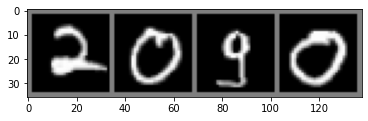

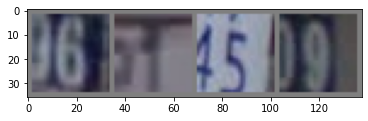

In [ ]:
data_loader_X_sample = torch.utils.data.DataLoader(train_X_set,
                                                 batch_size=4,
                                                 shuffle=True)
data_loader_Y_sample = torch.utils.data.DataLoader(train_Y_set,
                                                 batch_size=4,
                                                 shuffle=True)

# Get a batch of training data
X = next(iter(data_loader_X_sample))
Y = next(iter(data_loader_Y_sample))

# Make a grid from batch
out_X = torchvision.utils.make_grid(X[0])
out_Y = torchvision.utils.make_grid(Y[0])

imshow(out_X)
imshow(out_Y)

### Utils
* Use the below code for the convolution or the upconvolution

### *References*
[1] Zhu et al., "Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks", *ICCV*, 2017. <br>
[2] https://hardikbansal.github.io/CycleGANBlog/ <br>
[3] Glorot & Bengio, "Understanding the difficulty of training deep feedforward neural networks", *AISTATS* 2010. <br>
[4] Ioffe & Szegedy, "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift", *ICML* 2015.

In [ ]:
def conv2d(params_list, batch_norm = True):
    channel_in, channel_out, kernel_size, stride, padding, activation = params_list
    layers = []
    if batch_norm:
        layers += [nn.Conv2d(channel_in, channel_out, kernel_size, stride, padding, bias=False),
                   nn.BatchNorm2d(channel_out)]
        nn.init.xavier_uniform_(layers[0].weight)
    else:
        layers += [nn.Conv2d(channel_in, channel_out, kernel_size, stride, padding, bias=False)]
        nn.init.xavier_uniform_(layers[0].weight)

    if activation.lower() == 'relu':
        layers += [nn.ReLU(inplace=True)]
    if activation.lower() == 'leakyrelu':
        layers += [nn.LeakyReLU(0.2, inplace=True)]
    if activation.lower() == 'tanh':
        layers += [nn.Tanh()]
    if activation.lower() == 'sigmoid':
        layers += [nn.Sigmoid()]

    return nn.Sequential(*layers)

def upconv2d(params_list, batch_norm = True):
    channel_in, channel_out, kernel_size, stride, padding, activation = params_list
    layers = []
    if batch_norm:
        layers += [nn.ConvTranspose2d(channel_in, channel_out, kernel_size, stride, padding, bias=False),
                   nn.BatchNorm2d(channel_out)]
        nn.init.xavier_uniform_(layers[0].weight)
    else:
        layers += [nn.ConvTranspose2d(channel_in, channel_out, kernel_size, stride, padding, bias=False)]
        nn.init.xavier_uniform_(layers[0].weight)

    if activation.lower() == 'relu':
        layers += [nn.ReLU(inplace=True)]
    if activation.lower() == 'leakyrelu':
        layers += [nn.LeakyReLU(0.2, inplace=True)]
    if activation.lower() == 'tanh':
        layers += [nn.Tanh()]
    if activation.lower() == 'sigmoid':
        layers += [nn.Sigmoid()]

    return nn.Sequential(*layers)

def transpose(ndarray):
    return np.transpose(ndarray, [0,2,3,1])

def gray2rgb(ndarray):
    return np.concatenate((ndarray, ndarray, ndarray), axis=2)

### 2.1 Write the code (Generator) [3 points]
* You need to set the hyperparameters for implementing the upconvolutions (params_list)
* There are 'ReLU', 'LeakyReLU', 'Tanh', and 'Sigmoid' for the activation functions
* If you do not want to use the activation function, just put '' in the position of the activation function
* Other parameters, such as paddings, can be determined by calculating the formulation of convolutional process<br>
  (See in https://pytorch.org/docs/stable/nn.html)
* You have to use the functions **conv2d()** or **upconv2d()** which are defined from above

In [ ]:
print('STEP 3-1: CREATE MODEL CLASS (Generator)')


# [input channels, output channels, kernel_size, strides, paddings]

# cfg_g_enc_X = [[1, gfc, 4,2,1, 'leakyReLU'], [gfc, 2*gfc, 4, 2, 1, 'LeakyReLU']]
# cfg_g_enc_Y = [[3, gfc, 4,2,1, 'leakyReLU'], [gfc, 2*gfc, 4, 2, 1, 'LeakyReLU']]
# cfg_g_trans = [[128,128,3,1,1,'LeakyReLU'], [128,128,3,1,1,'LeakyReLU'], [128,128,3,1,1,'LeakyReLU']]
# cfg_g_dec_X = [[2*gfc, gfc, 4,2,1, 'ReLU'], [gfc, 3, 4,2,1,'Tanh']]
# cfg_g_dec_Y = [[2*gfc, gfc, 4,2,1, 'ReLU'], [gfc, 1, 4,2,1,'Tanh']]

#spacial size를 점진적으로 증가
cfg_g_enc_X = [[1, gfc, 4,2,1, 'leakyReLU'], [gfc, 2*gfc, 8, 2, 3, 'LeakyReLU']]
cfg_g_enc_Y = [[3, gfc, 4,2,1, 'leakyReLU'], [gfc, 2*gfc, 8, 2, 3, 'LeakyReLU']]
cfg_g_trans = [[128,128,3,1,1,'LeakyReLU'], [128,128,3,1,1,'LeakyReLU'], [128,128,3,1,1,'LeakyReLU']]
cfg_g_dec_X = [[2*gfc, gfc, 4,2,1, 'ReLU'], [gfc, 3, 8,2,3,'Tanh']]
cfg_g_dec_Y = [[2*gfc, gfc, 4,2,1, 'ReLU'], [gfc, 1, 8,2,3,'Tanh']]

# cfg_g_enc_X = [[1, gfc, 4,2,1, 'leakyReLU'], [gfc, 2*gfc, 6, 2, 2, 'LeakyReLU']]
# cfg_g_enc_Y = [[3, gfc, 4,2,1, 'leakyReLU'], [gfc, 2*gfc, 6, 2, 2, 'LeakyReLU']]
# cfg_g_trans = [[128,128,3,1,1,'LeakyReLU'], [128,128,3,1,1,'LeakyReLU'], [128,128,3,1,1,'LeakyReLU']]
# cfg_g_dec_X = [[2*gfc, gfc, 4,2,1, 'ReLU'], [gfc, 3, 8,2,3,'Tanh']]
# cfg_g_dec_Y = [[2*gfc, gfc, 4,2,1, 'ReLU'], [gfc, 1, 8,2,3,'Tanh']]

class Generator_X(nn.Module):
    def __init__(self):
        super(Generator_X, self).__init__()

        #############
        #encoder

        self.conv1_x=conv2d(cfg_g_enc_X[0],batch_norm=False)
        self.conv2_x= conv2d(cfg_g_enc_X[1])

        #transform
        self.conv3_x=conv2d(cfg_g_trans[0])
        self.conv4_x=conv2d(cfg_g_trans[1])
        self.conv5_x=conv2d(cfg_g_trans[2])

        #decoder
        self.conv6_x = upconv2d(cfg_g_dec_X[0])
        self.conv7_x = upconv2d(cfg_g_dec_X[1],batch_norm=False)
        #############

    def forward(self, x):

        #############
        x=self.conv1_x(x)
        out1=self.conv2_x(x)
        out2=self.conv3_x(out1)+out1
        out3=self.conv4_x(out2)+out2
        out4=self.conv5_x(out3)+out3
        out=self.conv6_x(out4)
        out=self.conv7_x(out)
        return out
        #############

class Generator_Y(nn.Module):
    def __init__(self):
        super(Generator_Y, self).__init__()

        #############
        #encoder
        self.conv1_y=conv2d(cfg_g_enc_Y[0],batch_norm=False)
        self.conv2_y= conv2d(cfg_g_enc_Y[1])

        #transform
        self.conv3_y=conv2d(cfg_g_trans[0])
        self.conv4_y=conv2d(cfg_g_trans[1])
        self.conv5_y=conv2d(cfg_g_trans[2])

        #decoder
        self.conv6_y=upconv2d(cfg_g_dec_Y[0])
        self.conv7_y= upconv2d(cfg_g_dec_Y[1],batch_norm=False)

        #############


    def forward(self, x):

        #############
        x=self.conv1_y(x)
        out1=self.conv2_y(x)
        out2=out1+self.conv3_y(out1)
        out3=out2+self.conv4_y(out2)
        out4=out3+self.conv5_y(out3)
        out=self.conv6_y(out4)
        out=self.conv7_y(out)

        return out
        #############


STEP 3-1: CREATE MODEL CLASS (Generator)


### 2.2 Write the code (Discriminator) [3 points]
* You need to set the hyperparameters for implementing the convolutions (params_list)
* There are 'ReLU', 'LeakyReLU', 'Tanh', and 'Sigmoid' for the activation functions
* If you do not want to use the activation function, just put '' in the position of the activation function
* Other parameters, such as paddings, can be determined by calculating the formulation of convolutional process<br>
  (See in https://pytorch.org/docs/stable/nn.html)
* You have to use the functions **conv2d()** or **upconv2d()** which are defined from above

In [ ]:
print('STEP 3-2: CREATE MODEL CLASS (Discriminator)')


# [input channels, output channels, kernel_size, strides, paddings]

cfg_d_X = [[1,gfc,4,2,1,'LeaykReLU'], [gfc,2*gfc,4,2,1,'LeakyReLU'], [2*gfc,4*gfc,4,2,5,'LeakyReLU'], [4*gfc,1,1,1,0,'Sigmoid']]
cfg_d_Y = [[3,gfc,4,2,1,'LeaykReLU'], [gfc,2*gfc,4,2,1,'LeakyReLU'], [2*gfc,4*gfc,4,2,5,'LeakyReLU'], [4*gfc,1,1,1,0,'Sigmoid']]


class Discriminator_X(nn.Module):
    def __init__(self):
        super(Discriminator_X, self).__init__()

        #############
        self.conv1_x = conv2d(cfg_d_X[0], batch_norm=False)
        self.conv2_x = conv2d(cfg_d_X[1])
        self.conv3_x = conv2d(cfg_d_X[2])
        self.conv4_x = conv2d(cfg_d_X[3], batch_norm=False)
        #############

    def forward(self, x):

        #############
        x=self.conv1_x(x)
        x=self.conv2_x(x)
        x=self.conv3_x(x)
        x=self.conv4_x(x)

        return x
        #############

class Discriminator_Y(nn.Module):
    def __init__(self):
        super(Discriminator_Y, self).__init__()

        #############
        self.conv1_y = conv2d(cfg_d_Y[0], batch_norm=False)
        self.conv2_y = conv2d(cfg_d_Y[1])
        self.conv3_y = conv2d(cfg_d_Y[2])
        self.conv4_y = conv2d(cfg_d_Y[3], batch_norm=False)
        #############

    def forward(self, x):

        #############
        x=self.conv1_y(x)
        x=self.conv2_y(x)
        x=self.conv3_y(x)
        x=self.conv4_y(x)

        return x
        #############


STEP 3-2: CREATE MODEL CLASS (Discriminator)


In [ ]:
print('STEP 4: INSTANTIATE MODEL CLASS')


model_G_X = Generator_X()
model_G_Y = Generator_Y()
model_D_X = Discriminator_X()
model_D_Y = Discriminator_Y()


#######################
#  USE GPU FOR MODEL  #
#######################


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_G_X.to(device)
print(model_G_X)
model_G_Y.to(device)
print(model_G_Y)
model_D_X.to(device)
print(model_D_X)
model_D_Y.to(device)

STEP 4: INSTANTIATE MODEL CLASS
Generator_X(
  (conv1_x): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv2_x): Sequential(
    (0): Conv2d(64, 128, kernel_size=(8, 8), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv3_x): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv4_x): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (co

Discriminator_Y(
  (conv1_y): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2_y): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv3_y): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(5, 5), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (conv4_y): Sequential(
    (0): Conv2d(256, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): Sigmoid()
  )
)

In [ ]:
print('STEP 5: INSTANTIATE LOSS CLASS')

criterion_GAN = nn.BCELoss()
criterion_L1 = nn.L1Loss()

print('STEP 6: INSTANTIATE OPTIMIZER CLASS')

optimizer_G_X = torch.optim.Adam(model_G_X.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_G_Y = torch.optim.Adam(model_G_Y.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D_X = torch.optim.Adam(model_D_X.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D_Y = torch.optim.Adam(model_D_Y.parameters(), lr=lr, betas=(beta1, 0.999))

STEP 5: INSTANTIATE LOSS CLASS
STEP 6: INSTANTIATE OPTIMIZER CLASS


### 2.3 Train the Cycle GAN [4 points]
* After the training is finished, check out the generated samples
* If the samples are generated well, then you will get the full score

STEP 7: TRAIN THE MODEL
it[0100/4685] 	Loss_D:2.3433 	Loss_G:1.7629 	Loss_C:0.2071 	elapsed_time:0.79mins
it[0200/4685] 	Loss_D:2.2784 	Loss_G:1.8425 	Loss_C:0.1806 	elapsed_time:1.56mins
it[0300/4685] 	Loss_D:2.3302 	Loss_G:1.9816 	Loss_C:0.1654 	elapsed_time:2.34mins
it[0400/4685] 	Loss_D:2.0779 	Loss_G:2.2871 	Loss_C:0.1713 	elapsed_time:3.20mins
it[0500/4685] 	Loss_D:1.9789 	Loss_G:2.6478 	Loss_C:0.1491 	elapsed_time:4.06mins
it[0600/4685] 	Loss_D:1.9299 	Loss_G:2.6483 	Loss_C:0.1661 	elapsed_time:4.91mins
it[0700/4685] 	Loss_D:1.4895 	Loss_G:2.7252 	Loss_C:0.1520 	elapsed_time:5.65mins
it[0800/4685] 	Loss_D:1.2358 	Loss_G:3.3558 	Loss_C:0.1691 	elapsed_time:6.39mins
it[0900/4685] 	Loss_D:2.0170 	Loss_G:3.9189 	Loss_C:0.1826 	elapsed_time:7.13mins
it[1000/4685] 	Loss_D:1.6973 	Loss_G:3.3113 	Loss_C:0.1784 	elapsed_time:7.89mins


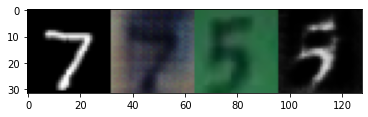

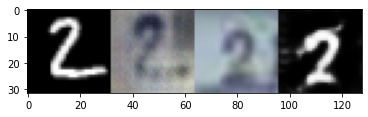

it[1100/4685] 	Loss_D:1.3641 	Loss_G:3.3377 	Loss_C:0.1688 	elapsed_time:8.89mins
it[1200/4685] 	Loss_D:0.8938 	Loss_G:3.7622 	Loss_C:0.1571 	elapsed_time:9.65mins
it[1300/4685] 	Loss_D:1.1111 	Loss_G:3.7798 	Loss_C:0.1827 	elapsed_time:10.39mins
it[1400/4685] 	Loss_D:1.0845 	Loss_G:4.0190 	Loss_C:0.1608 	elapsed_time:11.17mins
it[1500/4685] 	Loss_D:1.5910 	Loss_G:3.4240 	Loss_C:0.1696 	elapsed_time:11.91mins
it[1600/4685] 	Loss_D:1.0819 	Loss_G:3.6991 	Loss_C:0.1729 	elapsed_time:12.65mins
it[1700/4685] 	Loss_D:0.5040 	Loss_G:4.3313 	Loss_C:0.1724 	elapsed_time:13.39mins
it[1800/4685] 	Loss_D:0.4646 	Loss_G:5.0460 	Loss_C:0.1844 	elapsed_time:14.12mins
it[1900/4685] 	Loss_D:0.4872 	Loss_G:5.0372 	Loss_C:0.1582 	elapsed_time:14.85mins
it[2000/4685] 	Loss_D:0.7233 	Loss_G:5.3384 	Loss_C:0.1973 	elapsed_time:15.59mins


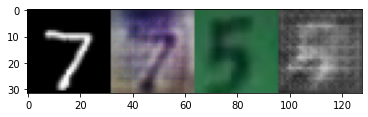

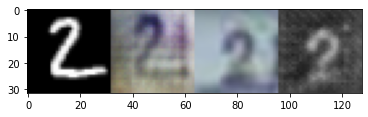

it[2100/4685] 	Loss_D:0.9522 	Loss_G:4.8779 	Loss_C:0.1545 	elapsed_time:16.50mins
it[2200/4685] 	Loss_D:1.1370 	Loss_G:5.5686 	Loss_C:0.1338 	elapsed_time:17.24mins
it[2300/4685] 	Loss_D:0.2830 	Loss_G:5.9403 	Loss_C:0.1489 	elapsed_time:18.05mins
it[2400/4685] 	Loss_D:0.3126 	Loss_G:6.2079 	Loss_C:0.1773 	elapsed_time:18.89mins
it[2500/4685] 	Loss_D:0.2385 	Loss_G:6.3587 	Loss_C:0.1316 	elapsed_time:19.91mins
it[2600/4685] 	Loss_D:0.1992 	Loss_G:6.5531 	Loss_C:0.1212 	elapsed_time:20.92mins
it[2700/4685] 	Loss_D:0.4589 	Loss_G:5.9752 	Loss_C:0.2534 	elapsed_time:21.91mins
it[2800/4685] 	Loss_D:1.1959 	Loss_G:5.1227 	Loss_C:0.2534 	elapsed_time:22.81mins
it[2900/4685] 	Loss_D:1.4542 	Loss_G:3.5295 	Loss_C:0.1755 	elapsed_time:23.68mins
it[3000/4685] 	Loss_D:0.9859 	Loss_G:5.4888 	Loss_C:0.1636 	elapsed_time:24.54mins


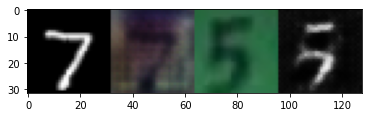

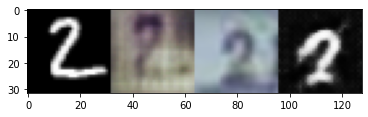

it[3100/4685] 	Loss_D:1.6176 	Loss_G:4.0111 	Loss_C:0.1710 	elapsed_time:25.57mins
it[3200/4685] 	Loss_D:1.4188 	Loss_G:4.1569 	Loss_C:0.1536 	elapsed_time:26.42mins
it[3300/4685] 	Loss_D:0.9722 	Loss_G:4.4639 	Loss_C:0.1601 	elapsed_time:27.26mins
it[3400/4685] 	Loss_D:0.5108 	Loss_G:5.8390 	Loss_C:0.1438 	elapsed_time:28.12mins
it[3500/4685] 	Loss_D:1.6760 	Loss_G:4.3330 	Loss_C:0.1504 	elapsed_time:28.95mins
it[3600/4685] 	Loss_D:1.4452 	Loss_G:4.2800 	Loss_C:0.1613 	elapsed_time:29.77mins
it[3700/4685] 	Loss_D:1.2548 	Loss_G:5.9794 	Loss_C:0.1689 	elapsed_time:30.65mins
it[3800/4685] 	Loss_D:0.3031 	Loss_G:6.0306 	Loss_C:0.1470 	elapsed_time:31.57mins
it[3900/4685] 	Loss_D:0.2701 	Loss_G:6.8284 	Loss_C:0.1541 	elapsed_time:32.47mins
it[4000/4685] 	Loss_D:0.2219 	Loss_G:7.0112 	Loss_C:0.1905 	elapsed_time:33.36mins


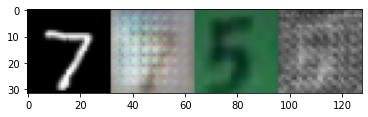

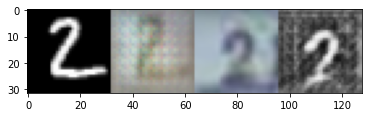

it[4100/4685] 	Loss_D:0.3136 	Loss_G:7.3046 	Loss_C:0.1880 	elapsed_time:34.49mins
it[4200/4685] 	Loss_D:0.7058 	Loss_G:5.1726 	Loss_C:0.1485 	elapsed_time:35.46mins
it[4300/4685] 	Loss_D:1.1904 	Loss_G:5.0799 	Loss_C:0.1744 	elapsed_time:36.45mins
it[4400/4685] 	Loss_D:0.4158 	Loss_G:6.8556 	Loss_C:0.1537 	elapsed_time:37.45mins
it[4500/4685] 	Loss_D:2.9434 	Loss_G:3.8893 	Loss_C:0.1816 	elapsed_time:38.47mins
it[4600/4685] 	Loss_D:1.7099 	Loss_G:3.1697 	Loss_C:0.1497 	elapsed_time:39.48mins


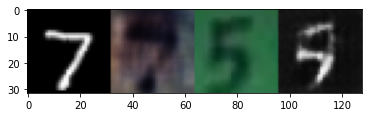

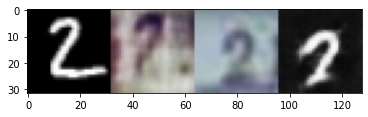

In [ ]:
print('STEP 7: TRAIN THE MODEL')

label_real = torch.full((bs, 1, 8, 8), real_label, dtype=torch.float32, device=device)
label_fake = torch.full((bs, 1, 8, 8), fake_label, dtype=torch.float32, device=device)

num_iter = 0
max_iter = num_epochs*len(train_X_loader)

train_start_time = time.time()
for epoch in range(1, num_epochs+1):
    for batch_index, data_X in enumerate(train_X_loader):
        model_G_X.train()
        model_G_Y.train()
        model_D_X.train()
        model_D_Y.train()

        data_X = data_X[0].to(device)
        data_Y = next(iter(train_Y_loader))[0].to(device)

        ### Update discriminator model(X AND Y)

        #############
         # Clear gradients w.r.t. parameters
        model_D_X.zero_grad()
        model_D_Y.zero_grad()

        ##Discriminator X

         # Forward pass to get results of discriminator for real data
        output_DX_real = model_D_X(data_X)
        loss_DX_real=criterion_GAN(output_DX_real,label_real)

        # Forward pass to get results of discriminator for fake data
        fake_A = model_G_Y(data_Y)
        output_DX_fake = model_D_X(fake_A.detach())
        loss_DX_fake=criterion_GAN(output_DX_fake, label_fake)


        ##Discriminator Y

         # Forward pass to get results of discriminator for real data
        output_DY_real = model_D_Y(data_Y)
        loss_DY_real=criterion_GAN(output_DY_real,label_real)

        # Forward pass to get results of discriminator for fake data
        fake_B = model_G_X(data_X)
        output_DY_fake = model_D_Y(fake_B.detach())
        loss_DY_fake=criterion_GAN(output_DY_fake, label_fake)



        err_DX = loss_DX_real +loss_DX_fake
        err_DY = loss_DY_real +loss_DY_fake

        err_D = err_DX + err_DY
        # Getting gradients w.r.t. parameters
        err_D.backward()

        # Updating parameters
        optimizer_D_X.step()
        optimizer_D_Y.step()

        #############

        ### Update generator model(X AND Y)

        #############
        # Clear gradients w.r.t. parameters
        model_G_X.zero_grad()
        model_G_Y.zero_grad()

        ##generator X
#         fake_B= model_G_X(data_X)
        output_GX_real=model_D_Y(fake_B)
        loss_G_X=criterion_GAN(output_GX_real, label_real)

        ##geneartor Y
#         fake_A= model_G_Y(data_Y)
        output_GY_real=model_D_X(fake_A)
        loss_G_Y=criterion_GAN(output_GY_real, label_real)

        ##Cycle consistency loss
        recovered_X=model_G_Y(fake_B)
        loss_C_X=criterion_L1(recovered_X, data_X)

        recovered_Y=model_G_X(fake_A)
        loss_C_Y=criterion_L1(recovered_Y, data_Y)
        #############

        err_G = loss_G_X + loss_G_Y
        err_C = loss_C_X + loss_C_Y

        loss_G = err_G + err_C*10


        # Getting gradients w.r.t. parameters
        loss_G.backward()

        # Updating parameters
        optimizer_G_X.step()
        optimizer_G_Y.step()

        num_iter += 1
        # Output training stats
        if num_iter%100 == 0:
            print('it[{:04d}/{:04d}] \tLoss_D:{:.4f} \tLoss_G:{:.4f} \tLoss_C:{:.4f} \telapsed_time:{:.2f}mins'.format(
                num_iter, max_iter, err_D.item(), err_G.item(), err_C.item(), (time.time()-train_start_time)/60
            ))

        if num_iter%1000==0 or num_iter==max_iter:
            save_name = osp.join(save_dir, 'it{:04d}.pt'.format(num_iter))
            torch.save({
                'model_G_X': model_G_X.state_dict(),
                'model_G_Y': model_G_Y.state_dict()
            }, save_name)

            with torch.no_grad():
                model_G_X.eval()
                model_G_Y.eval()
                for test_index, data_X in enumerate(test_X_loader):
                    if test_index == 0:

                        data_X = data_X[0].to(device)
                        data_Y = next(iter(test_Y_loader))[0].to(device)

                        output_X = model_G_X(data_X)
                        output_Y = model_G_Y(data_Y)

                        data_X = ((data_X+1)/2).cpu().data.numpy()
                        data_Y = ((data_Y+1)/2).cpu().data.numpy()

                        output_X = ((output_X + 1)/2).cpu().data.numpy()
                        output_Y = ((output_Y + 1)/2).cpu().data.numpy()

                        for vis_idx in range(vis_num):
                            data_X_, data_Y_ = gray2rgb(transpose(data_X)[vis_idx]), transpose(data_Y)[vis_idx]
                            output_X_, output_Y_  = transpose(output_X)[vis_idx], gray2rgb(transpose(output_Y)[vis_idx])
                            outputs = np.concatenate((data_X_, output_X_, data_Y_, output_Y_), axis=1)
                            plt.imshow(outputs)
                            plt.pause(0.001)

In [ ]:
#DISCUSSION
#이번 실험은 cycleGAN을 구현해보는 것으로, 기존의 GAN과 의 차이점은 input이 noise vector가 아닌 특정 domain의 image라는 것과 loss를 계산하는데  cycle consistency loss가 추가되었다는 점이다.
#DX,DY, GX, GY를 구현할떼, paddiing, stride, kernel size 선정에 어려움이 있었다.
#conv2d의 경우 h_out=(h_in+2*padding-kernel)/2+1 deconv2d의 경우 h_out=(h_in-2*padding+kernel)
#다음과 같은 수식을 이용하여 주어진 값을 변경하여 적용하였다.
#또 본실험에서 lamda값이 명시되어있지 않아서 논문에서 주어진 값인 10을 채택하여 적용하였다.
#그 결과, iteration이 1000번 반복되었을 때는
#(위 그림 순서 data_X / y dmain에서의 가짜 X / data_y / x domain에서의 가짜 y)를 참고했을 때,
#첫번째 줄의 7을 살펴보면 mnist domain의 7가 svhn domain의 7로 잘 generate되는 것을 확인했고,
#svhn domain의 5가 mnist domain에서 classification을 한다면 5가 가장 score가 높도록 잘 generate되는 것을 확인했다.
#2번째 줄의 2를 살펴보면 mnist domain의 2가 svhn domain의 2로 잘 generate되는 것을 확인했고, svhn domain의 2가 mnist domain의 2로 잘 generate되는 것을 확인했다.


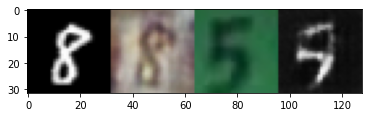

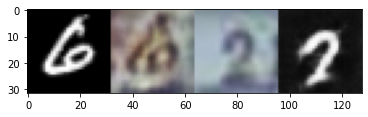

In [ ]:
data_X = data_X[0].to(device)
data_Y = next(iter(test_Y_loader))[0].to(device)

output_X = model_G_X(data_X)
output_Y = model_G_Y(data_Y)

data_X = ((data_X+1)/2).cpu().data.numpy()
data_Y = ((data_Y+1)/2).cpu().data.numpy()

output_X = ((output_X + 1)/2).cpu().data.numpy()
output_Y = ((output_Y + 1)/2).cpu().data.numpy()

for vis_idx in range(vis_num):
    data_X_, data_Y_ = gray2rgb(transpose(data_X)[vis_idx]), transpose(data_Y)[vis_idx]
    output_X_, output_Y_  = transpose(output_X)[vis_idx], gray2rgb(transpose(output_Y)[vis_idx])
    outputs = np.concatenate((data_X_, output_X_, data_Y_, output_Y_), axis=1)
    plt.imshow(outputs)
    plt.pause(0.001)

In [ ]:
#위 그림은 dataset내 다른 data를 통해 확인해본 결과이다.
#(위 그림 순서 data_X / y dmain에서의 가짜 X / data_y / x domain에서의 가짜 y)를 참고했을 때,
#첫번째 줄의 8을 살펴보면 mnist domain의 8가 svhn domain의 8로 잘 generate되는 것을 확인했고,
#svhn domain의 5가 mnist domain에서 classification을 한다면 5가 가장 score가 높도록 잘 generate되는 것을 확인했다.
#2번째 줄의 6를 살펴보면 mnist domain의 6가 svhn domain의 6으로 잘 generate되는 것을 확인했고, svhn domain의 2가 mnist domain의 2로 잘 generate되는 것을 확인했다.
